<a href="https://colab.research.google.com/github/HB-enpitsu/garakuta/blob/main/%E4%B8%8D%E5%AF%A9%E8%80%85%E6%83%85%E5%A0%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sudachipy sudachidict_full

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sudachidict_full: filename=SudachiDict_full-20230711-py3-none-any.whl size=126429434 sha256=f58304fb74bd911976ad459a144507af5076face9902d1fca86bd539efc2dc8e
  Stored in directory: /root/.cache/pip/wheels/4d/93/5b/106c91ed8cfb3e9a79980afe4b91ef9b4e47ad76f92ddfb54f
Successfully built sudachidict_full


sudachidict_core

In [2]:
!pip install wordcloud

In [3]:
!apt install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (8,310 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 120831 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

In [4]:
import requests
from bs4 import BeautifulSoup

In [5]:
url = "https://www.police.pref.ehime.jp/fushinsha.htm"

In [6]:
r = requests.get(url)
r.raise_for_status()

In [7]:
soup = BeautifulSoup(r.content, "html.parser")

# データクレンジング


In [8]:
import pandas as pd

In [9]:
pd.options.plotting.backend = "plotly"

In [10]:
df0 = pd.read_html(soup.prettify(), header=0)[2]

In [11]:
# 列名の空白を除去
df0.columns = df0.columns.str.replace("\s", "", regex=True)

In [12]:
df0

,概要,備考
0,（松山東署管内） ◆種別：写真撮影等 ◆日時：令和５年８月３日(木）午後８時ころ ◆場...,NaN
1,（松山東署管内） ◆種別：声かけ ◆日時：令和５年８月３日(木）午前10時ころ ◆場所...,NaN
2,（松山西署管内） ◆種別：卑わいな言動 ◆日時：令和５年８月５日（土）午後２時ころ ◆...,NaN
3,（新居浜署管内） ◆種別：つきまとい ◆日時：令和５年７月31日(月)午後５時ころ ◆...,NaN
4,（松山東署管内） ◆種別：身体露出 ◆日時：令和５年７月30日(日）午後７時10分ころ ...,NaN
...,...,...
177,(松山東署管内） ◆種別：つきまとい ◆日時：令和５年１月７日(土) 午前１時ころ ◆...,NaN
178,（松山東署管内） ◆種別：のぞき・盗撮 ◆日時：令和５年１月６日(金) 午後２時20分こ...,NaN
179,（松山東署管内） ◆種別：声かけ ◆日時：令和５年１月６日(金) 午前11時20分ころ ...,NaN
180,（松山東署管内） ◆種別：写真撮影等 ◆日時：令和５年１月５日(木) 午後５時ころ ◆...,NaN


In [13]:
# 各項目ごとに分割
df1 = (
    df0["概要"]
    .str.split("◆", expand=True)
    .set_axis(["所轄", "種別", "日時", "場所", "状況", "特徴"], axis=1)
)

In [14]:
# 空白除去、正規化、列名除去
for col in df1.select_dtypes(include=object).columns:
    df1[col] = (
        df1[col]
        .str.strip()
        .str.normalize("NFKC")
        .str.replace(f"^{col}:", "", regex=True)
    )

In [15]:
# 備考を追加
df1["備考"] = df0["備考"].str.strip().str.normalize("NFKC")

In [16]:
# かっこを除去
df1["所轄"] = df1["所轄"].str.strip("()")

In [17]:
df1

,所轄,種別,日時,場所,状況,特徴,備考
0,松山東署管内,写真撮影等,令和5年8月3日(木)午後8時ころ,松山市宮田町の店舗内,女性が友人と店舗内にいたところ、2回にわたり、男にスマートフォンのカメラレンズを向けられたもの。,40-50歳位、165-170cm位、やせ型、黒色長髪(後ろ髪を1つ結び、毛先は茶色)、黒色...,NaN
1,松山東署管内,声かけ,令和5年8月3日(木)午前10時ころ,松山市美沢2丁目の路上,小学生女児が自転車で移動中、徒歩の男に「誰。」等と声をかけられたもの。,70歳位、150cm位、小肥、短髪(白髪交じり)、黒色半袖Tシャツ、暗色系短パン(膝上丈)、...,NaN
2,松山西署管内,卑わいな言動,令和5年8月5日(土)午後2時ころ,松山市馬木町の公園内,小学生女児2人が公園内で遊んでいたところ、男が徒歩で来て近くのベンチに座り、ズボンの中に手を...,40-60歳位、中肉、黒色短髪、白色半袖シャツ、水色長ズボン、二重まぶた、スマートフォン所持,NaN
3,新居浜署管内,つきまとい,令和5年7月31日(月)午後5時ころ,新居浜市繁本町から同市一宮1丁目までの路上,男子中学生が自転車で移動中、徒歩の男に追いかけられ、紙コップを投げつけられたもの。,70歳位、紫色上衣,NaN
4,松山東署管内,身体露出,令和5年7月30日(日)午後7時10分ころ,松山市竹原4丁目の路上,男が、下半身を露出して路上に立っていたもの。,40-50歳位、170-180cm位、やせ型、帽子着用,NaN
...,...,...,...,...,...,...,...
177,松山東署管内,つきまとい,令和5年1月7日(土) 午前1時ころ,松山市本町6丁目から同市東長戸4丁目までの路上,女性が車両で走行中、車両に乗車の男から後方を追従され、追い越された後に待ち伏せされるなどして...,25~40歳位、中肉、メガネ着用、銀色様の軽四自動車利用,NaN
178,松山東署管内,のぞき・盗撮,令和5年1月6日(金) 午後2時20分ころ,松山市三番町6丁目の施設敷地内,男が、窓ガラス越しにカーテンの隙間から、室内を覗き見ていたもの。,40歳位、身長170センチ位、上下黒色様の服、黒色ニット帽着用、黒色リュックサック所持、徒歩,NaN
179,松山東署管内,声かけ,令和5年1月6日(金) 午前11時20分ころ,松山市畑寺2丁目の路上,男子中学生が歩行中、すれ違った車両が後退して真横で停車し、乗車していた男から暴言を吐かれたもの。,50~60歳位、白髪混じりの黒色短髪、オレンジ色ダウンジャケット、白色マスク着用、帽子・メガ...,NaN
180,松山東署管内,写真撮影等,令和5年1月5日(木) 午後5時ころ,松山市小栗1丁目の河川敷,女性が男児と歩行中、付近をランニングしていた男が前方約50メートル先に立ち止まり、リュックサ...,40~50歳位、やせ型、身長160センチ位、灰色長袖ジャージ、灰色ジャージズボン、黒色リュッ...,NaN



# 日付変換


In [18]:
# 日付抽出
df_date = (
    df1["日時"]
    .str.replace("\s", "", regex=True)
    .str.extract(
        "(?P<era>令和)(?P<year>\d{1,2}年)(?P<month>\d{1,2}月)(?P<day>\d{1,2}日)?.*(?P<ampm>午前|午後)(?P<hour>\d{1,2}時)(?P<minutes>\d{1,2}分)?"
    )
)

In [19]:
# 数字に変換
df_date["year"] = pd.to_numeric(df_date["year"].str.rstrip("年"), errors="coerce")
df_date["month"] = pd.to_numeric(df_date["month"].str.rstrip("月"), errors="coerce")
df_date["day"] = pd.to_numeric(df_date["day"].str.rstrip("日"), errors="coerce")
df_date["hour"] = pd.to_numeric(df_date["hour"].str.rstrip("時"), errors="coerce")
df_date["minutes"] = pd.to_numeric(df_date["minutes"].str.rstrip("分"), errors="coerce").fillna(0)

In [20]:
df_date.isnull().sum()

era        0
year       0
month      0
day        3
ampm       0
hour       0
minutes    0
dtype: int64

In [21]:
# 令和の場合、年を+2018
df_date["year"] = df_date["year"].mask(df_date["era"] == "令和", df_date["year"] + 2018)

# 午後の場合、時を+12
df_date["hour"] = df_date["hour"].mask(df_date["ampm"] == "午後", df_date["hour"] + 12)

In [22]:
# datetimeに変換
df1["datetime"] = pd.to_datetime(df_date[["year", "month", "day", "hour", "minutes"]], errors="coerce")

In [23]:
# 日付なし
df1[df1["datetime"].isna()]

,所轄,種別,日時,場所,状況,特徴,備考,datetime
52,松山南署管内,声かけ,令和5年5月中旬の午後4時ころ,松山市土居町の路上,小学生男児が徒歩で移動中、徒歩の男から「どこに住んどるん。」と声をかけられたもの。,60歳位、170cm位、小太り、短髪、上衣:灰色長袖スウェット、下衣:紺色ジャージ、帽子、メ...,NaN,NaT
83,新居浜署管内,つきまとい,令和5年4月上旬の午後11時ころ,新居浜市桜木町の路上,女子中学生他1人が徒歩で移動中、路上に立っていた徒歩の男から後方をつきまとわれたもの。,中年位、170cm位、上衣:黒色様服、下衣:黒色様ズボン,NaN,NaT
84,松山南署管内,声かけ,令和5年4月初旬の午後5時ころ,松山市平井町の路上,女性が徒歩で移動中、車両(軽トラック様)に乗車の男から、「ご主人おるんか。」等と声をかけられ...,70-80歳位,NaN,NaT


# 表示

In [24]:
df1

,所轄,種別,日時,場所,状況,特徴,備考,datetime
0,松山東署管内,写真撮影等,令和5年8月3日(木)午後8時ころ,松山市宮田町の店舗内,女性が友人と店舗内にいたところ、2回にわたり、男にスマートフォンのカメラレンズを向けられたもの。,40-50歳位、165-170cm位、やせ型、黒色長髪(後ろ髪を1つ結び、毛先は茶色)、黒色...,NaN,2023-08-03 20:00:00
1,松山東署管内,声かけ,令和5年8月3日(木)午前10時ころ,松山市美沢2丁目の路上,小学生女児が自転車で移動中、徒歩の男に「誰。」等と声をかけられたもの。,70歳位、150cm位、小肥、短髪(白髪交じり)、黒色半袖Tシャツ、暗色系短パン(膝上丈)、...,NaN,2023-08-03 10:00:00
2,松山西署管内,卑わいな言動,令和5年8月5日(土)午後2時ころ,松山市馬木町の公園内,小学生女児2人が公園内で遊んでいたところ、男が徒歩で来て近くのベンチに座り、ズボンの中に手を...,40-60歳位、中肉、黒色短髪、白色半袖シャツ、水色長ズボン、二重まぶた、スマートフォン所持,NaN,2023-08-05 14:00:00
3,新居浜署管内,つきまとい,令和5年7月31日(月)午後5時ころ,新居浜市繁本町から同市一宮1丁目までの路上,男子中学生が自転車で移動中、徒歩の男に追いかけられ、紙コップを投げつけられたもの。,70歳位、紫色上衣,NaN,2023-07-31 17:00:00
4,松山東署管内,身体露出,令和5年7月30日(日)午後7時10分ころ,松山市竹原4丁目の路上,男が、下半身を露出して路上に立っていたもの。,40-50歳位、170-180cm位、やせ型、帽子着用,NaN,2023-07-30 19:10:00
...,...,...,...,...,...,...,...,...
177,松山東署管内,つきまとい,令和5年1月7日(土) 午前1時ころ,松山市本町6丁目から同市東長戸4丁目までの路上,女性が車両で走行中、車両に乗車の男から後方を追従され、追い越された後に待ち伏せされるなどして...,25~40歳位、中肉、メガネ着用、銀色様の軽四自動車利用,NaN,2023-01-07 01:00:00
178,松山東署管内,のぞき・盗撮,令和5年1月6日(金) 午後2時20分ころ,松山市三番町6丁目の施設敷地内,男が、窓ガラス越しにカーテンの隙間から、室内を覗き見ていたもの。,40歳位、身長170センチ位、上下黒色様の服、黒色ニット帽着用、黒色リュックサック所持、徒歩,NaN,2023-01-06 14:20:00
179,松山東署管内,声かけ,令和5年1月6日(金) 午前11時20分ころ,松山市畑寺2丁目の路上,男子中学生が歩行中、すれ違った車両が後退して真横で停車し、乗車していた男から暴言を吐かれたもの。,50~60歳位、白髪混じりの黒色短髪、オレンジ色ダウンジャケット、白色マスク着用、帽子・メガ...,NaN,2023-01-06 11:20:00
180,松山東署管内,写真撮影等,令和5年1月5日(木) 午後5時ころ,松山市小栗1丁目の河川敷,女性が男児と歩行中、付近をランニングしていた男が前方約50メートル先に立ち止まり、リュックサ...,40~50歳位、やせ型、身長160センチ位、灰色長袖ジャージ、灰色ジャージズボン、黒色リュッ...,NaN,2023-01-05 17:00:00


In [25]:
df1["種別"].unique()

array(['写真撮影等', '声かけ', '卑わいな言動', 'つきまとい', '身体露出', '盗撮', '身体接触', '不審者',
       'ちかん', '暴行', 'のぞき・盗撮(迷防)', '写真撮影', 'のぞき・盗撮', '凝視'], dtype=object)

In [26]:
df1["category"] = df1["種別"]

df1["category"] = df1["category"].mask(df1["category"].isin(["写真撮影等"]), "写真撮影")
df1["category"] = df1["category"].mask(df1["category"].isin(["盗撮", "のぞき・盗撮(迷防)"]), "のぞき・盗撮")

In [27]:
df1["category"].unique()

array(['写真撮影', '声かけ', '卑わいな言動', 'つきまとい', '身体露出', 'のぞき・盗撮', '身体接触', '不審者',
       'ちかん', '暴行', '凝視'], dtype=object)

# SQL

In [28]:
import sqlite3

In [29]:
con = sqlite3.connect("fushinsya.db")
df1.to_sql("suspicious", con, if_exists="replace", index=False)
con.close()

# 分析

In [30]:
# 行為者特定、解決
df1[df1["備考"].notna()]

,所轄,種別,日時,場所,状況,特徴,備考,datetime,category
17,松山東署管内,声かけ,令和5年7月11日(火)午後3時ころ,松山市南江戸3丁目の路上,小学生男児が徒歩で移動中、自転車(黒色)に乗車の男に「アメあげるからこっちにおいで。」と声を...,30歳位、170cm位、中肉、黒色短髪(パーマ)、赤色Tシャツ、鞄(黒色と緑色)所持,行為者特定、解決,2023-07-11 15:00:00,声かけ
23,今治署管内,写真撮影等,令和5年7月2日(日)午後4時20分ころ,今治市郷六ヶ内町2丁目の店舗内,女性2人が店舗内にいたところ、同店舗内の座席に座っていた男にスマートフォンを向けられたもの。,35-50歳位、170cm位、中肉、黒色短髪、黒色半袖服、黒色長ズボン、ヘッドフォン(首にか...,行為者特定、解決,2023-07-02 16:20:00,写真撮影
40,松山西署管内,写真撮影等,令和5年6月16日(金)午前7時20分ころ,松山市北吉田町の路上,小学生男女児が移動中、自転車から降車し歩道橋に上がった男から、カメラを向けられたもの。男は、...,40-50歳位、170cm位、中肉、上衣:白色半袖ポロシャツ、下衣:灰色長ズボン、黒色一眼レ...,行為者特定、解決,2023-06-16 07:20:00,写真撮影
72,西条署管内,写真撮影等,令和5年5月18日(木)午後3時50分ころ,西条市大町の路上,小学生女児が徒歩で移動中、車(灰色)に乗車の男からスマートフォン(手帳型カバー付き)を向けら...,30-40歳位、黒髪,行為者特定、解決,2023-05-18 15:50:00,写真撮影
100,松山東署管内,声かけ,令和5年4月14日(金)午後3時30分ころ,松山市南江戸4丁目の路上,女子中学生が徒歩で移動中、自転車(銀色、軽快兼用)に乗車の男から「君は、男・女どっち。」等と...,18~30歳位、170cm位、中肉、黒髪(セミロング)、上衣:赤色半袖Tシャツ、下衣:黒色ジャージ,行為者特定、解決,2023-04-14 15:30:00,声かけ
117,松山西署管内,写真撮影,令和5年3月22日(水) 午後5時20分ころ,松山市高岡町の路上,小学生男女児が公園内にいたところ、車両に乗車の男からスマートフォンを向けられたもの。,50~70歳位、身長体型不明、黒色ニット帽着用、スマートフォン所持、銀色自動車使用,行為者特定、解決,2023-03-22 17:20:00,写真撮影
123,新居浜署管内,声かけ,令和5年3月15日(水) 午前10時40分,新居浜市瀬戸町の店舗駐車場内,女子高校生が店舗駐車場にいたところ、車で来店した男から「電話番号教えて。どっか行くん。」等と...,60歳位、やせ型、上下黒色の服、白色マスク、白色キャップ帽着用、白色の普通乗用自動車使用,行為者特定、解決,2023-03-15 10:40:00,声かけ
150,大洲署管内,声かけ,令和5年2月6日(月) 午後3時ころ,喜多郡内子町内子の店舗内,未就学児が親族と店舗内にいたところ、男から腕を掴まれ「どこの子?」等と声をかけられたもの。,70~80歳位、上衣:紺色トレーナー、下衣:灰色ズボン、黒色帽子着用、徒歩,行為者特定、解決,2023-02-06 15:00:00,声かけ
161,松山東署管内,写真撮影等,令和5年1月24日(火) 午前11時ころ,松山市湊町7丁目の路上,女子高校生が路上にいたところ、電柱に隠れた男からデジタルカメラを向けられたもの。,50~60歳位、ベージュ色の服、紺色ジーパン、灰色ニット帽・黒色運動靴着用、黒色リュックサッ...,行為者特定、解決,2023-01-24 11:00:00,写真撮影


In [31]:
df1["所轄"].value_counts().plot.barh()

In [32]:
df1["category"].value_counts().plot.barh()

In [33]:
# 発生時間帯別
df1["datetime"].dropna().dt.hour.value_counts().plot.bar()

# sudachipy

+ https://qiita.com/eiennohito/items/20472187b236cf45fe12
+ https://ozro-223.hatenablog.com/entry/2023/01/30/230402
+ https://qiita.com/komugi_papa/items/7d04e386550406371ec5

In [34]:
from sudachipy import tokenizer
from sudachipy import dictionary

In [35]:
class SudachiTokenizer:
    def __init__(self, dict_type="core", mode="C", stopwords=None, include_pos=None):
        if dict_type not in ["core", "small", "full"]:
            raise Exception("invalid dict_type. 'core' ,'small' or 'full'")
        self.tokenizer_obj = dictionary.Dictionary(dict=dict_type).create()

        if mode not in ["A", "B", "C"]:
            raise Exception("invalid mode. 'A' ,'B' or 'C'")
        self.mode = getattr(tokenizer.Tokenizer.SplitMode, mode)
        print(self.mode)

        if stopwords is None:
            self.stopwords = []
        else:
            self.stopwords = stopwords

        if include_pos is None:
            self.include_pos = ["名詞", "動詞", "形容詞"]
        else:
            self.include_pos = include_pos

    def parser(self, text):
        return self.tokenizer_obj.tokenize(text, self.mode)

    def tokenize(self, text, pos=False):
        res = []
        for m in self.parser(text):
            p = m.part_of_speech()
            base = m.normalized_form()  # .dictionary_form()
            # print(base, ": ", p)
            if p[0] in self.include_pos and base not in self.stopwords and p[1] != "数詞":
                if pos:
                    res.append((base, p[0]))
                else:
                    res.append(base)
        return res

In [36]:
def create_word_chain(se, tokenizer):

    word_lists = []

    for text in se:
        word_list = tokenizer.tokenize(text, pos=False)

        for word in word_list:
            word_lists.append(word)

    word_chain = " ".join(word_lists)

    return word_chain

In [37]:
include_pos = ["名詞", "動詞", "形容詞"]
stopwords = []

In [38]:
sudachi_tokenizer = SudachiTokenizer(dict_type="full", mode="A", stopwords=stopwords, include_pos=include_pos)

In [39]:
word_chain = create_word_chain(df1["状況"], sudachi_tokenizer)

# WordCloud

In [40]:
from wordcloud import WordCloud

In [41]:
import matplotlib.pyplot as plt

In [42]:
stop_words = []

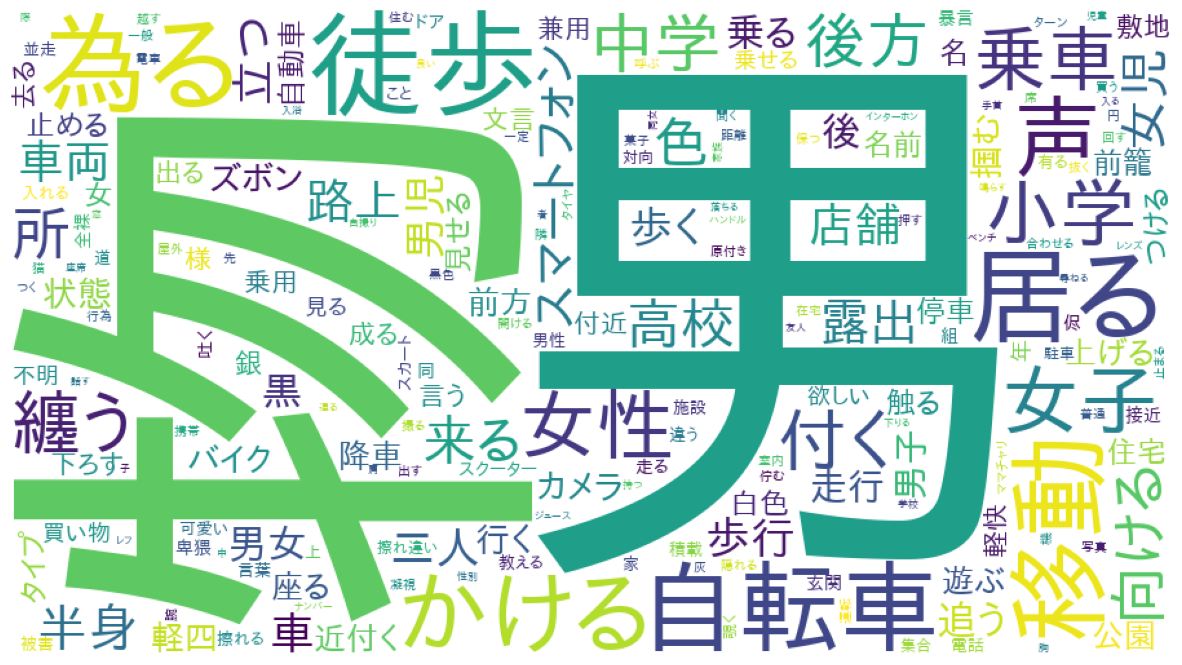

In [43]:
wordcloud = WordCloud(
    background_color="white",
    font_path="/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf",
    collocations=False,
    stopwords=set(stop_words),
    width=900,
    height=500,
).generate(word_chain)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()